## Some Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
full_data = pd.read_csv('../../../golf_course_project_data/combined2012to2016.zip') 

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20,21,22,27,33,34,35,39,41,43,44,45,46,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
full_data.head()

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,Humidity,Visibility,WindBearing,WindGust,WindSpeed,PrecipitationIntensity,PrecipitationType,CourseName_weather,WeatherDateAndHour,TimeDifference
0,R,PGA TOUR,2012,10,23800,656,16,Bryce,Molder,1,...,0.51,9.94,56.0,NaN,17.48,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:35:00.000000000
1,R,PGA TOUR,2012,10,1116,656,16,Michael,Bradley,1,...,0.51,9.94,56.0,NaN,17.48,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:36:00.000000000
2,R,PGA TOUR,2012,10,23800,656,16,Bryce,Molder,1,...,0.51,9.94,56.0,NaN,17.48,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:41:00.000000000
3,R,PGA TOUR,2012,10,1116,656,16,Michael,Bradley,1,...,0.51,9.94,56.0,NaN,17.48,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:42:00.000000000
4,R,PGA TOUR,2012,10,1116,656,16,Michael,Bradley,1,...,0.51,9.94,56.0,NaN,17.48,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:45:00.000000000


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5522327 entries, 0 to 5522326
Data columns (total 64 columns):
TourCode                   object
TourDescription            object
Year                       int64
TournamentNum              int64
PlayerNum                  int64
CourseNum                  int64
PermanentTournamentNum     int64
PlayerFirstName            object
PlayerLastName             object
Round                      int64
TournamentName             object
CourseName_shots           object
Hole                       int64
HoleScore                  float64
ParValue                   int64
Yardage                    int64
Shot                       int64
ShotType                   object
NumStrokes                 int64
FromLocationScorer         object
FromLocationEnhanced       object
ToLocationScorer           object
ToLocationEnhanced         object
Distance                   int64
DistanceToPin              int64
InTheHoleFlag              object
AroundTheGreenF

In [ ]:
#Combine player first and last name into new column


#def combine_names(row):
 #   return row['PlayerFirstName'] + row['PlayerLastName']

#full_data['PlayerName'] = full_data.apply(lambda x: combine_names(x), axis = 1)

In [ ]:
#full_data[['PlayerFirstName','PlayerLastName','PlayerName']].head()

### Strokes Gained vs Precipitation Intensity

In [55]:
def plot_strokes_gained_by_cat(x_var):
    sns.lmplot(x = x_var, y = 'StrokesGainedBaseline', col = 'StrokesGainedCategory', data = full_data,
          fit_reg = False)

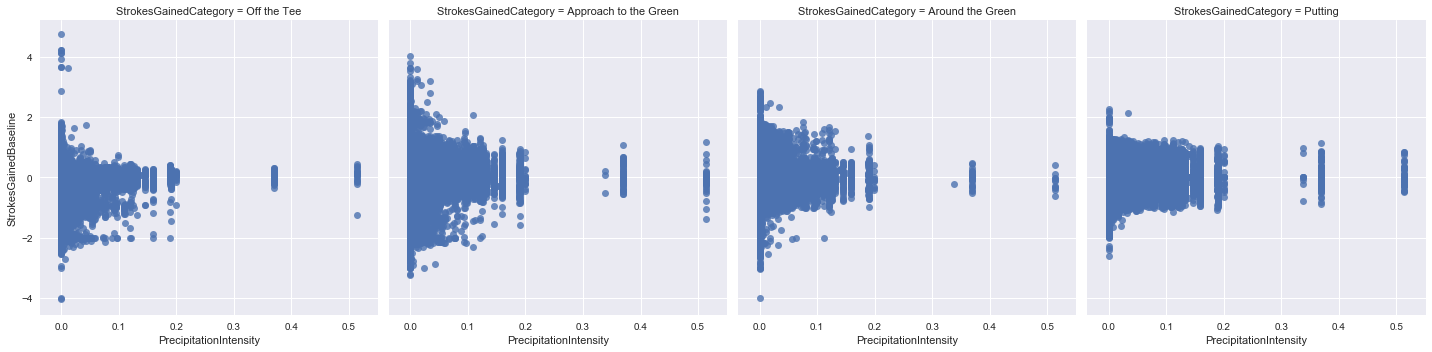

In [56]:
plot_strokes_gained_by_cat('PrecipitationIntensity')

**Thoughts**

- It makes sense to me that heavier precipitation would reduce the likelihood of a good shot, but it also limits bad shots, which seems counterintuitive. Perhaps golfers play safer in the rain?  

### Strokes Gained (Baseline) vs Wind Metrics

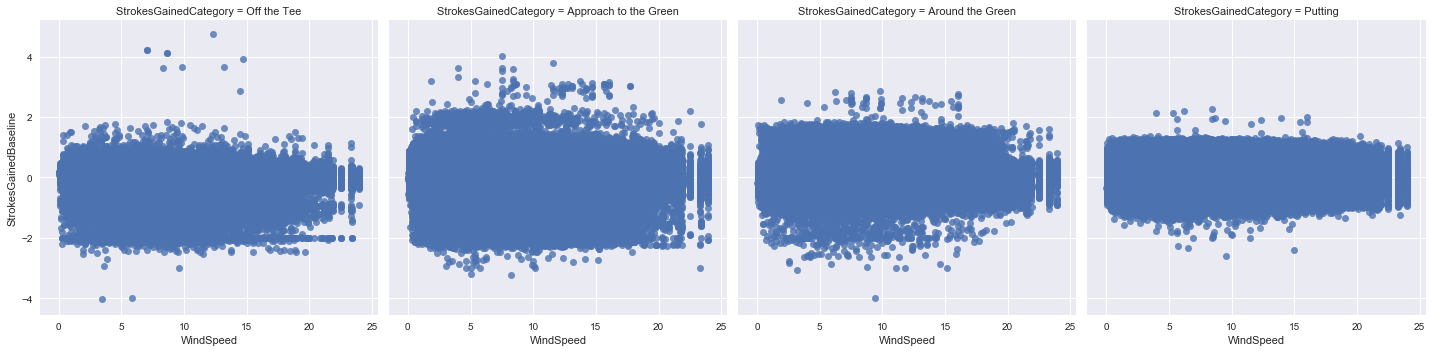

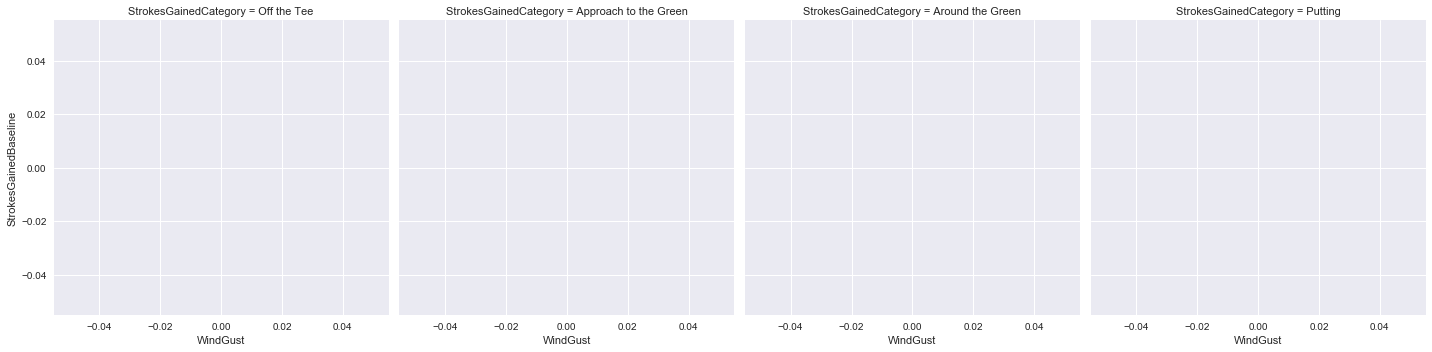

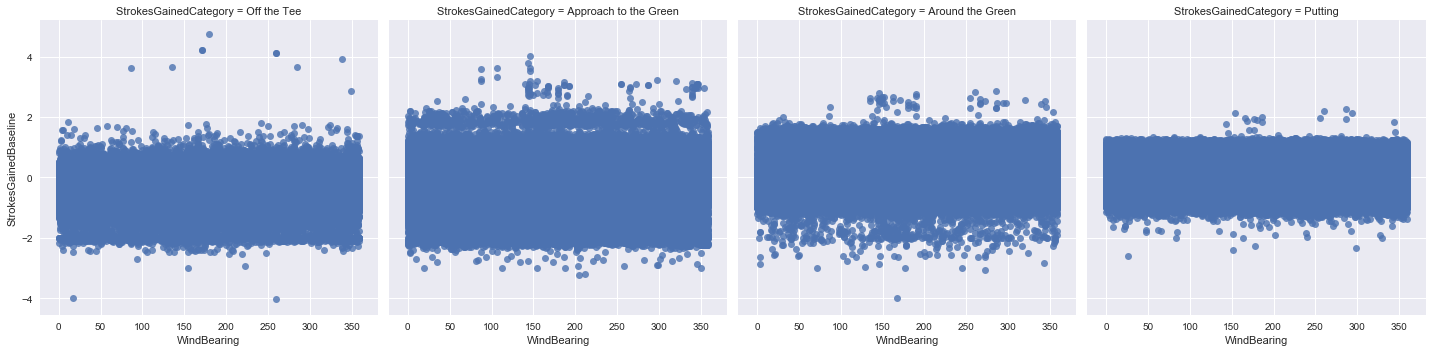

In [45]:
wind_metrics = ['WindSpeed','WindGust','WindBearing']

for metric in wind_metrics:
    plot_strokes_gained_by_cat(metric)

**Thoughts**

- Doesn't appear that to be any significant trends with the wind metrics. 
- What's up with WindGust??

In [31]:
full_data['WindGust'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: WindGust, dtype: float64

Looks like there's just no WindGust data...

### Strokes Gained vs Humidity

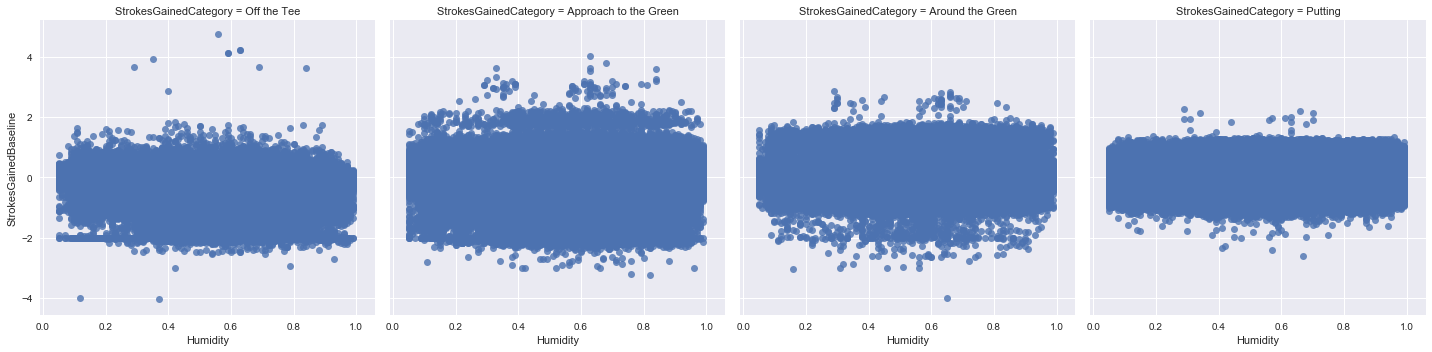

In [46]:
plot_strokes_gained_by_cat('Humidity')

**Thoughts**

- Slight negative trend between humidity and strokes gained for shots off the tee?

In [53]:
np.corrcoef(full_data[full_data['StrokesGainedCategory'] == 'Off the Tee']['StrokesGainedBaseline'],
       full_data[full_data['StrokesGainedCategory'] == 'Off the Tee']['Humidity'])

array([[ 1.        , -0.03450804],
       [-0.03450804,  1.        ]])

Indeed

### Strokes Gained vs Temperature

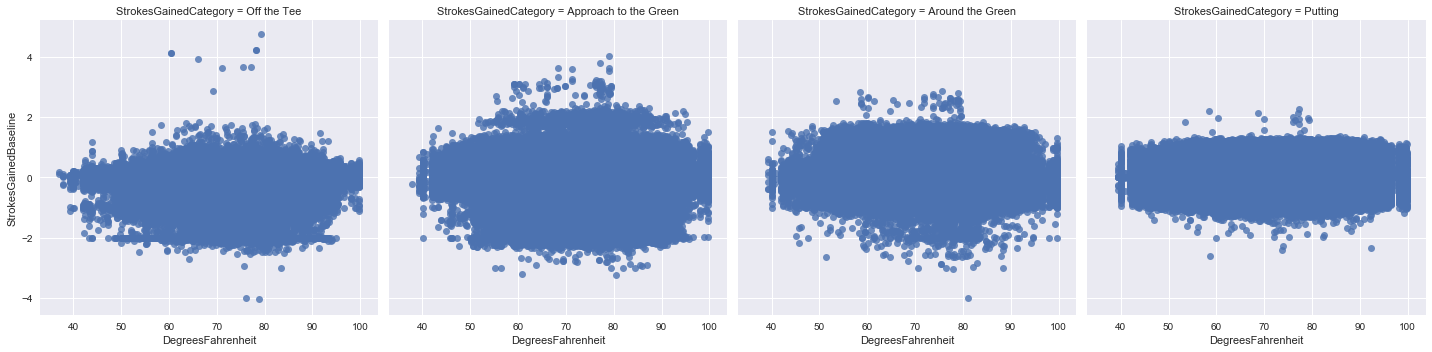

In [54]:
plot_strokes_gained_by_cat('DegreesFahrenheit')

**Thoughts**

- Looks like Strokes Gained decreases at the extremes. 
- Limit on max temp of 100? 

In [59]:
full_data['DegreesFahrenheit'].describe()

count    5.522327e+06
mean     7.339802e+01
std      8.926747e+00
min      3.697000e+01
25%      6.763000e+01
50%      7.472000e+01
75%      7.978000e+01
max      9.977000e+01
Name: DegreesFahrenheit, dtype: float64

### Strokes Gained vs Visibility

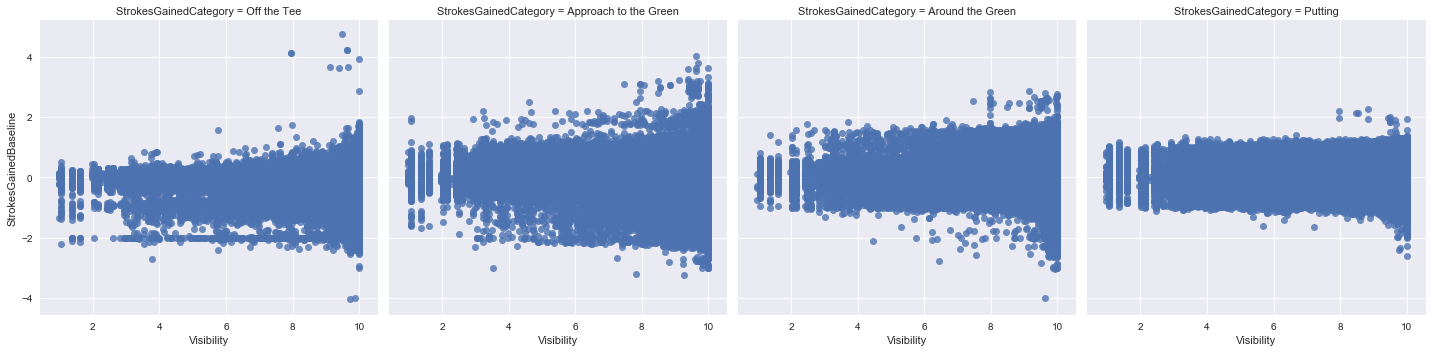

In [57]:
plot_strokes_gained_by_cat('Visibility')

**Thoughts**

- Like high precipitation intensity, poor visiblity seems to reduce both good and bad shots, again suggesting that perhaps golfers play it safe in these conditions. 
- Should plot visibility vs precipitation intensity to look for colinearity

In [ ]:
sns.lmplot('Visibility', 'PrecipitationIntensity', data = full_data, fit_reg = False)

Some trend, but not strong. 